In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

with open('Sherlock Holmes.txt', 'r') as file:
    text = file.read()

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# TOKENIZATION

In [30]:
tokens = word_tokenize(text)

normalized_tokens = [token.lower() for token in tokens if token.isalnum()]

# EXTRACTING RELAVANT WORDS

In [31]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in normalized_tokens if token not in stop_words]

def extract_relevant_words(tokens):
    relevant_words = []
    for token in tokens:
        if re.match(r'\b[a-z]{6,}\b', token): 
            relevant_words.append(token)
    return relevant_words

relevant_words = extract_relevant_words(filtered_tokens)

# STEMMING AND LEMMATIZATION

In [32]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in relevant_words]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in relevant_words]

print("Tokens:", filtered_tokens[:15])
print("Stemmed words:", stemmed_words[:15])
print("Lemmatized words:", lemmatized_words[:15])

Tokens: ['project', 'gutenberg', 'adventures', 'sherlock', 'holmes', 'arthur', 'conan', 'doyle', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions']
Stemmed words: ['project', 'gutenberg', 'adventur', 'sherlock', 'holm', 'arthur', 'anyon', 'anywher', 'almost', 'restrict', 'whatsoev', 'project', 'gutenberg', 'licens', 'includ']
Lemmatized words: ['project', 'gutenberg', 'adventure', 'sherlock', 'holmes', 'arthur', 'anyone', 'anywhere', 'almost', 'restriction', 'whatsoever', 'project', 'gutenberg', 'license', 'included']


# PLOTS

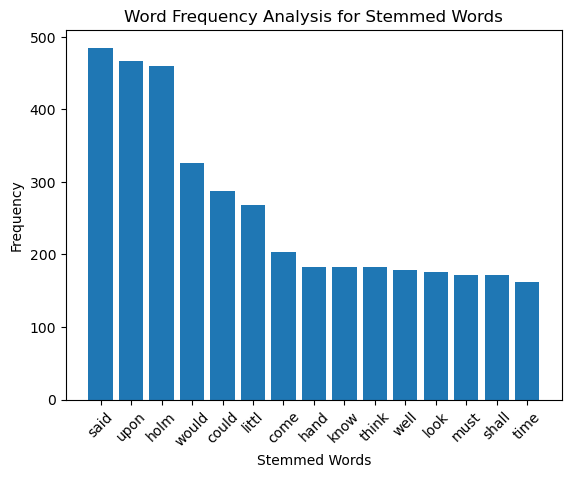

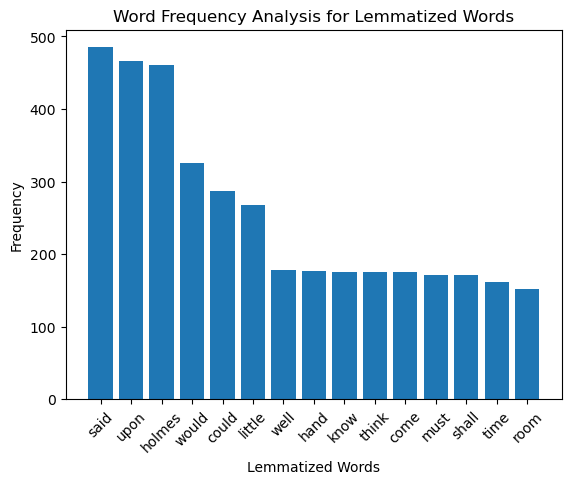

Most common words ending with 'ing' (stemmed): [('thing', 29), ('spring', 10), ('bring', 8), ('swing', 6), ('forefing', 5)]
Most common words ending with 'ing' (lemmatized): [('nothing', 104), ('morning', 93), ('something', 64), ('anything', 51), ('looking', 42)]


In [33]:
most_common_stemmed_words = stemmed_word_counts.most_common(15)
plt.bar([word[0] for word in most_common_stemmed_words], [count[1] for count in most_common_stemmed_words])
plt.title('Word Frequency Analysis for Stemmed Words')
plt.xlabel('Stemmed Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

most_common_lemmatized_words = lemmatized_word_counts.most_common(15)
plt.bar([word[0] for word in most_common_lemmatized_words], [count[1] for count in most_common_lemmatized_words])
plt.title('Word Frequency Analysis for Lemmatized Words')
plt.xlabel('Lemmatized Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


most_common_ing_stemmed = [word for word in stemmed_words if word.endswith('ing')]
most_common_ing_lemmatized = [word for word in lemmatized_words if word.endswith('ing')]

print("Most common words ending with 'ing' (stemmed):", Counter(most_common_ing_stemmed).most_common(5))
print("Most common words ending with 'ing' (lemmatized):", Counter(most_common_ing_lemmatized).most_common(5))